In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

g = 9.8 #m/s^2

ndigits = 2

# Esercizi di dinamica del punto materiale

Gli esercizi proposti sono tratti da:

1. Mazzoldi Saggion Voci : Problemi di Fisica generale (MSV)
2. Mazzoldi Nigro Voci : Fisica Vol. 1(MNV)
3. Temi d'esame (TE)

__Programma__

__Lezione 2 - (17 marzo)__ 

Forza peso e vincoli e attriti (moti rettilinei), piano inclinato e combinazione fili e attriti.

Esercizi svolti 2.19, 2.21, 2.24 e 2.28.

__Lezione 3 -  (24 marzo)__

Vincoli in moti circolari  (senza utilizzo conservazione dell' energia).
  
Esercizi svolti 2.9, 2.10 e 2.36.
 
Richiamo di cinematica del moto circolare dal cap. 1, esercizio 1.23.
  
__Lezioni 4 e 5 (3 aprile e 10 aprile)__ 

Lavoro delle forze e conservazione energia meccanica.

Esercizi svolti dal capitolo 2 : 2.6, 2.8, 2.11.
Dal capitolo 4 : 4.6, 4.12

Oscillatore armonico (preparare analisi numerica python)

## MSV - Esercizio 2.19

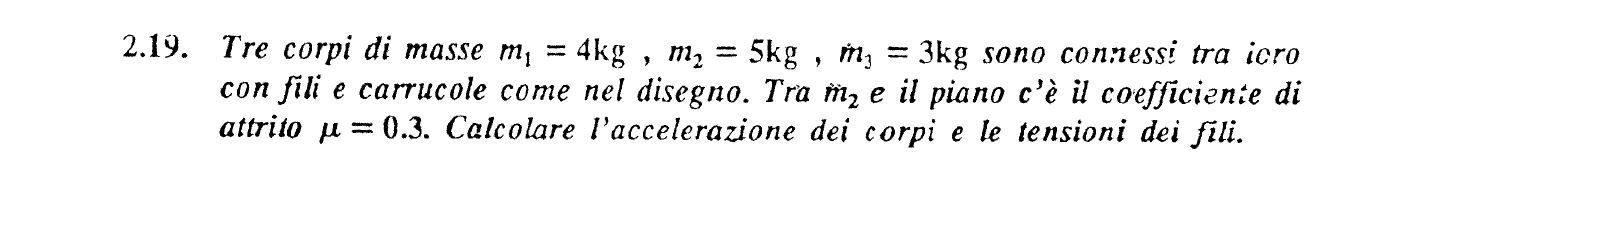

In [7]:
Image('Immagini/MSV_2.19_Testo1.png',width=900)

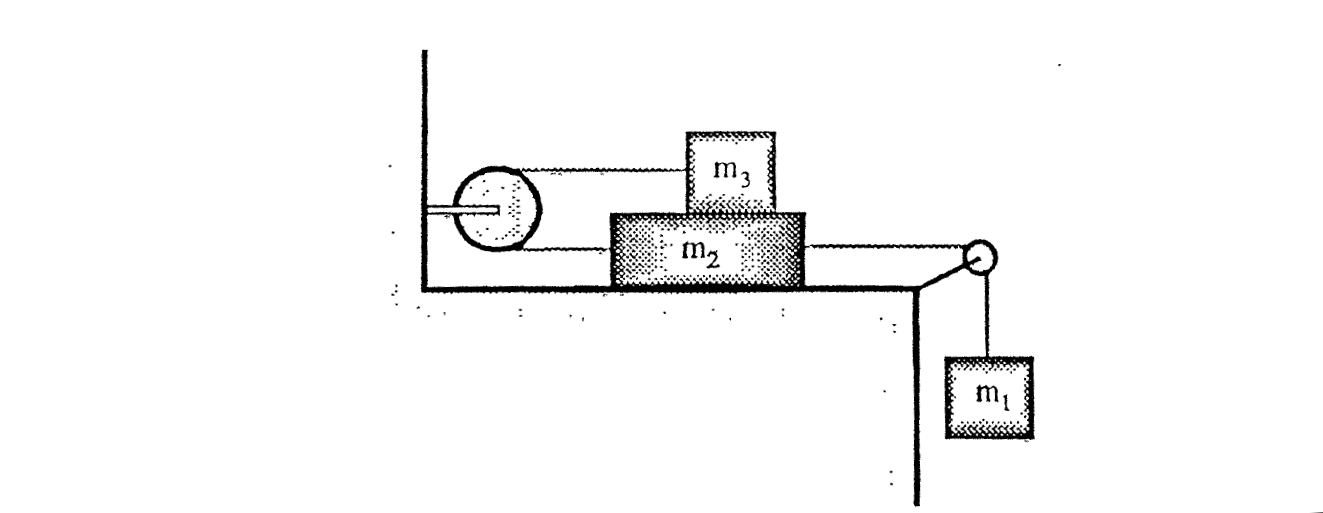

In [8]:
Image('Immagini/MSV_2.19_Testo2.png',width=900)

__Lettura del testo__

I fili in tensione fanno si che il modulo dell'accelerazione sia lo stesso per le tre masse. 

Dobbiamo scrivere le componenti rilevanti per il moto dell'equazione di Newton per le tre
masse e da queste calcolare l'accelerazione e le tensioni dei fili.

__Svolgimento__

Usiamo un sistema di riferimento cartesiano $(x,z)$ con l'asse verticale rivolto verso il basso e scriviamo
le equazioni del moto $\vec{F}=m\vec{a}$ per ciascuna massa.

Massa 1 componente $z$
$$
 m_{1}g - T_1 = m_1 a
$$

Massa 2 componente $x$
$$
T_1-T_2- (m_{2}+m_3)\mu g = m_2 a
$$

Massa 3 componente $x$
$$
-T_2 = -m_3 a
$$
E' conveniente combinare le equazioni per eliminare le tensioni dei fili. Sommiamole membro a membro
$$
m_1 g - (m_{2}+m_3)\mu g  = (m_1+m_2+m_3)a
$$
abbiamo eliminato $T_1$ e $T_2$ e calcoliamo l'accelerazione delle masse
$$
a = \frac{m_1 g - (m_{2}+m_3)\mu g}{m_1+m_2+m_3}
$$
Possiamo controllare questa formula in vari modi:
* analisi dimensionale
* confronto con qualche caso semplice, ad esempio $m_3=0$ e attrito nullo

Una volta nota $a$ calcoliamo le tensioni dei fili utilizzando ancora le equazioni del moto delle masse
$$
T_1 = m_1(g-a) \, , \quad 
T_2 = m_3 a 
$$
Infine sostituiamo i valori numerici per il calcolo

In [15]:
m1,m2,m3 = 4,5,3 # kg
mu = 0.3

In [13]:
a = (m1*g-(m2+m3)*mu*g)/(m1+m2+m3)
a_round = round(a,ndigits)
print('a = %s m/s^2'%a_round)

a = 1.31 m/s^2


In [14]:
T1,T2 = m1*(g-a),m3*a
T1_round,T2_round = round(T1,ndigits),round(T2,ndigits)
print('T1 = %s N'%T1_round)
print('T2 = %s N'%T2_round)

T1 = 33.97 N
T2 = 3.92 N


## MSV - Esercizio 2.21

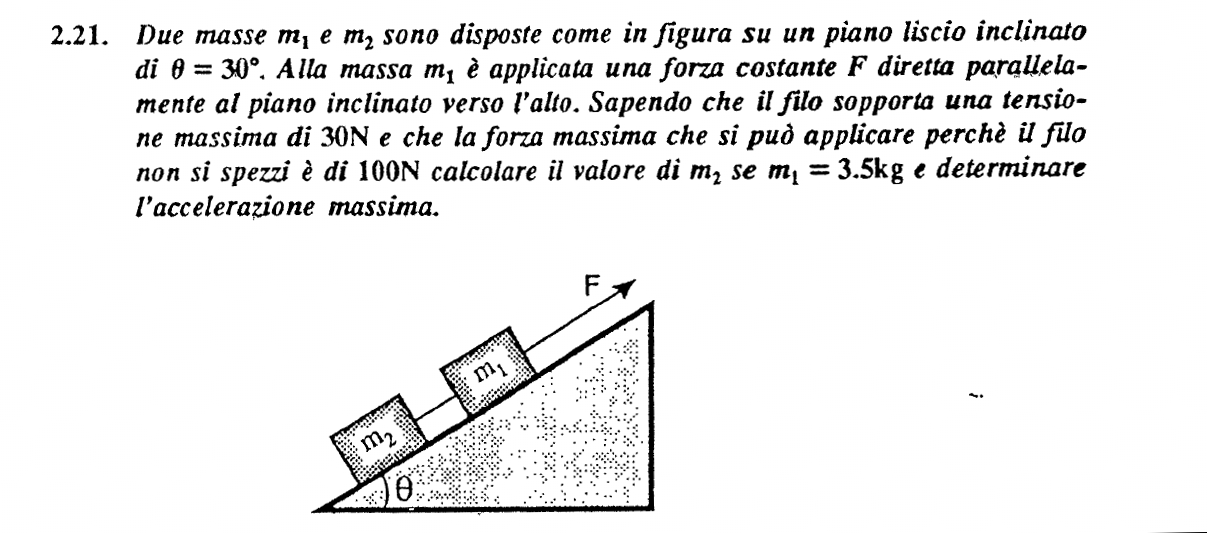

In [4]:
Image('Immagini/MSV_2.21_Testo.png',width=900)

__Lettura del testo__

Dobbiamo determinare le espressioni della accelerazione (uguale fra le 2 masse) e della tensione del filo.

Una volta risolto il sistema esprimiamo i parametri incogniti in funzione di quelli noti.

__Svolgimento__

Scriviamo le equazioni di Newton per le 2 masse e ci interessa la sola componente parallela
alla direzione del piano inclinato. Quindi scegliamo un sistema di riferimento cartesiano con 
l'asse $x$ parllallelo al piano inclinato e diretto come la forza $F$ agente su $m_1$.

Equazioni del moto:
$$
F-T-m_1gsin(\theta) = m_1 a \, , \quad
T-m_2gsin(\theta) = m_2 a
$$
Procediamo come nell'esercizio precedente: eliminiamo $T$ sommando le equazioni, quindi calcoliamo
$a$ e infine sostituiamo $a$ in una equazione per calcolare $T$.
$$
a = \frac{F-(m_1+m_2)gsin(\theta)}{m_1+m_2} \, , \quad
T = \frac{m_2}{m_1+m_2}F
$$
Controlliamo i risultati con analisi dimensionale e conseguenze fisiche delle formule
* l'accelerazione concide con quella di una singola massa $m_1+m2$ (senza filo)
* la tensione del filo _non_ dipende dalla pendenza del piano

Per rispondere alla domanda del problema esprimiamo $m_2$ come
$$
m_2 = m_1\frac{T}{F-T}
$$
Infine sostituiamo i valori numerici per il calcolo

In [5]:
m1 = 3.5 # kg
F,T = 100,30 # N
theta = 30*np.pi/180 # rad

In [6]:
m2 = m1*T/(F-T)
m2_round = round(m2,ndigits)
print('m_2 = %s kg'%m2_round)

m_2 = 1.5 kg


In [7]:
a = (F-(m1+m2)*g*np.sin(theta))/(m1+m2)
a_round = round(a,ndigits)
print('a = %s m/s^2'%a_round)

a = 15.1 m/s^2


## MSV - Esercizio 2.24

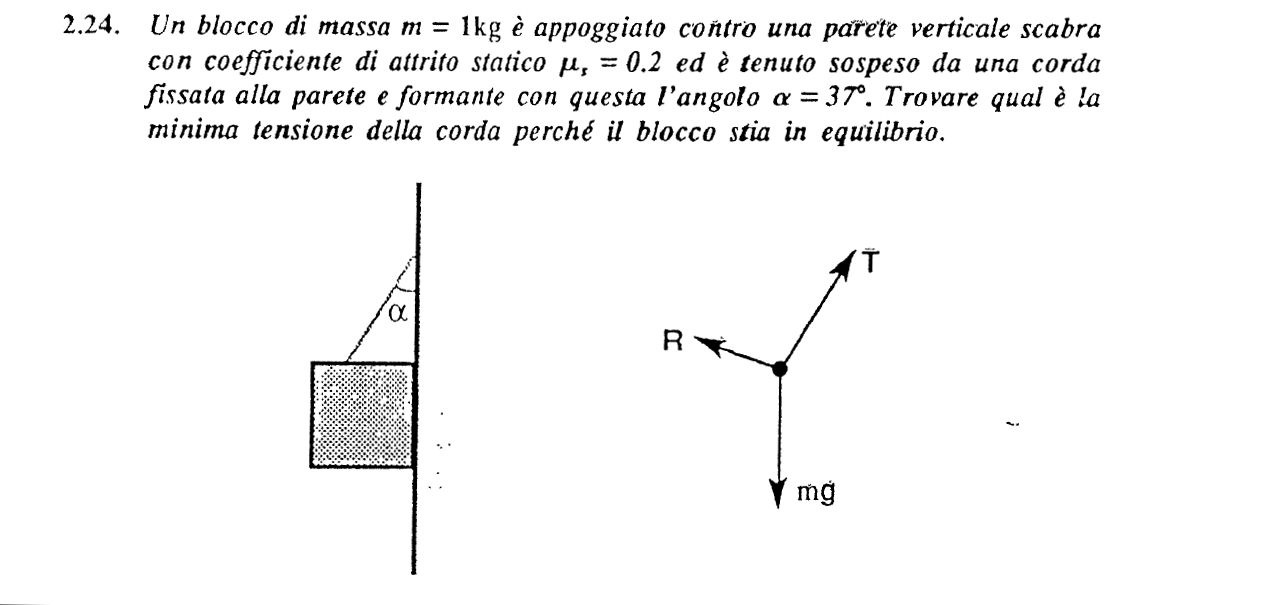

In [8]:
Image('Immagini/MSV_2.24_Testo.png',width=900)

__Svolgimento__

La condizione di equilibrio si realizza se la risultante (vettoriale) di tutte le forze agenti sul sistema è nulla.

In questo caso sul blocco di massa $m$ agiscono la foza peso, la tensione del filo, la reazione vincolare della
parete e la forza di attrito statico (proporzionale alla reazione vincolare).

Proiettiamo tutte le forze in un sistema cartesiano con un asse orizzontale (e quindi ortogonale alla parete)
e uno verticale e imponiamo la condizione di equilibrio
$$
Tsin(\alpha) - R_N = 0 \, , \quad
mg-Tcos(\alpha) \leq \mu_s R_N
$$
da cui ricaviamo
$$
T \geq \frac{mg}{\mu_s sin(\alpha)+cos(\alpha)}
$$
La tensione minima si ottiene quando $T$ è uguale al membro di destra.

Infine sostituiamo i valori numerici per il calcolo

In [9]:
m = 1.0 # kg
mu = 0.2
alpha = 37*np.pi/180 # rad

In [10]:
T = m*g/(mu*np.sin(alpha)+np.cos(alpha))
T_round = round(T,ndigits)
print('T = %s N'%T_round)

T = 10.66 N


## MSV - Esercizio 2.28

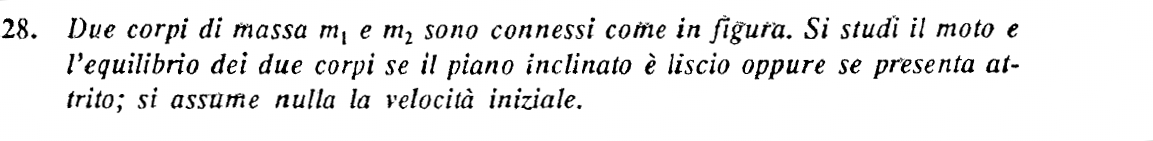

In [9]:
Image('Immagini/MSV_2.28_Testo1.png',width=900)

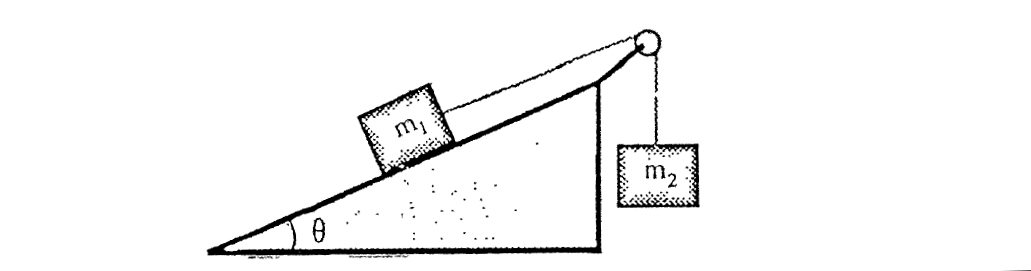

In [11]:
Image('Immagini/MSV_2.28_Testo2.png',width=900)

__Svolgimento__

_Attrito nullo_

Scriviamo al solito le (componenti rilevanti delle) equazioni del moto per le due masse
$$
m_2 g - T = m_2 a \, , \quad
-m_1 g sin(\theta) + T = m_1 a
$$
Da questo sistema di equazioni ricaviamo il modulo dell'accelerazione e la tensione del filo
$$
a = \frac{m_2-m_1sin(\theta)}{m_1+m_2} g \, , \quad
T = m_2(g-a) = \frac{m_1 m_2}{m_1+m_2}g(1+sin(\theta))
$$
Questa è la soluzione dell'analisi dinamica e da qui possiamo studiare il moto generico
del sistema.

Il sistema è in equilibrio se l'accelerazione è nulla. Questa condizione implica che
$$
m_1 sin(\theta) = m_2 \, , \quad T = m_2 g
$$
Se $m_1 sin(\theta) < m_2$ la massa $m_2$ scende lungo la verticale e $m_1$ è trascinata in
alto sul piano inclinato. Mentre nel caso inverso $m_2$ sale e $m_1$ scende lungo il piano inclinato.

_Analisi in presenza di attrito_

Assumendo che la massa $m_2$ scenda lungo la verticale scriviamo le equazioni del moto
$$
m_2 g - T = m_2 a \, , \quad
-m_1 g sin(\theta) -m_1 g cos(\theta) \mu+ T = m_1 a
$$
che risolviamo nuovamente per $a$ e $T$
$$
a = \frac{m_2-m_1(sin(\theta)+\mu cos(\theta))}{m_1+m_2} g \, , \quad
T = m_2(g-a) = \frac{m_1 m_2}{m_1+m_2}g(1+sin(\theta))
$$
La condizione di equilibrio statico si realizza se la risultante delle forze sulla massa $m_1$ è minore della forza d'attrito
$$
T-m_1gsin(\theta) \leq \mu_s R_N \, \rightarrow \quad
m_2 \leq m_1(sin(\theta)+\mu_s cos(\theta)
$$


Ripetete l'analisi assumento che $m_2$ salga lungo la verticale.

## MSV - Esercizio 2.9

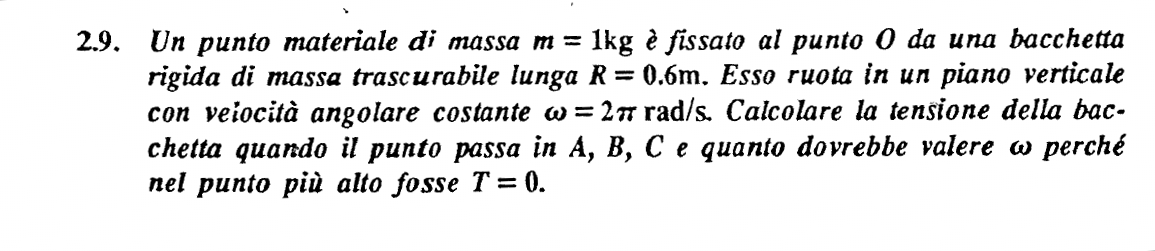

In [14]:
Image('Immagini/MSV_2.9_Testo1.png',width=900)

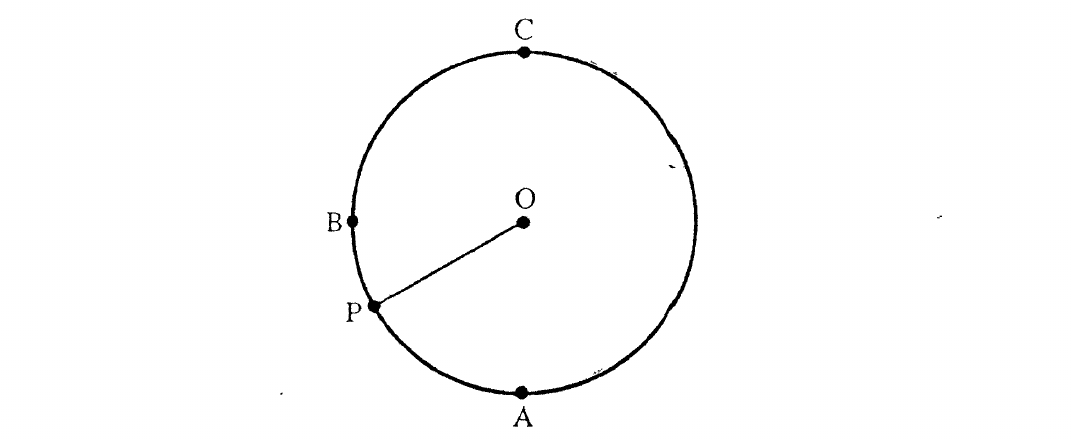

In [13]:
Image('Immagini/MSV_2.9_Testo2.png',width=900)

__Lettura del testo__

Questo è un problema _ibrido_ perchè ci viene fornita la geometria del problema e la presenza della forza
di gravità, ma è anche specificato il tipo di moto (velocità angolare costante). Segno che ci sono altre forze
in gioco non specificate nel testo. 

In questi casi limitatevi ad analizzare le equazioni necessarie per rispondere ai quesiti del testo.

__Svolgimento__

E' la stessa geometria del problema del pendolo (anche se qui è imposta la condizione di velocità angolare costante).

Scegliendo un angolo $\theta$ fra il punto $P$ e l'asse verticale possiamo scrivere le equazioni del moto lungo l'asse
normale al moto come
$$
T-mg cos(\theta) = m a_N = m\omega^2 R
$$
da cui ricaviamo
$$
T = m(gcos(\theta) + \omega^2 R)
$$
e quindi per i punti richiesti abbiamo
$$
T_A = m(g + \omega^2 R) \, , \quad
T_B = m\omega^2 R \, , \quad
T_C = m(-g + \omega^2 R)
$$
Infine sostituiamo i valori numerici per il calcolo

In [12]:
m = 1 # kg
R = 0.6 # m
o = 2*np.pi

In [20]:
TA,TB,TC = m*(g+o**2*R), m*o**2*R, m*(-g+o**2*R) 
TA_round,TB_round,TC_round = round(TA,ndigits),round(TB,ndigits),round(TC,ndigits)
print('T_A = %s N'%TA_round)
print('T_B = %s N'%TB_round)
print('T_C = %s N'%TC_round)

T_A = 33.49 N
T_B = 23.69 N
T_C = 13.89 N


E' possibile sostituire un filo alla bacchetta?

## MSV - Esercizio 2.10

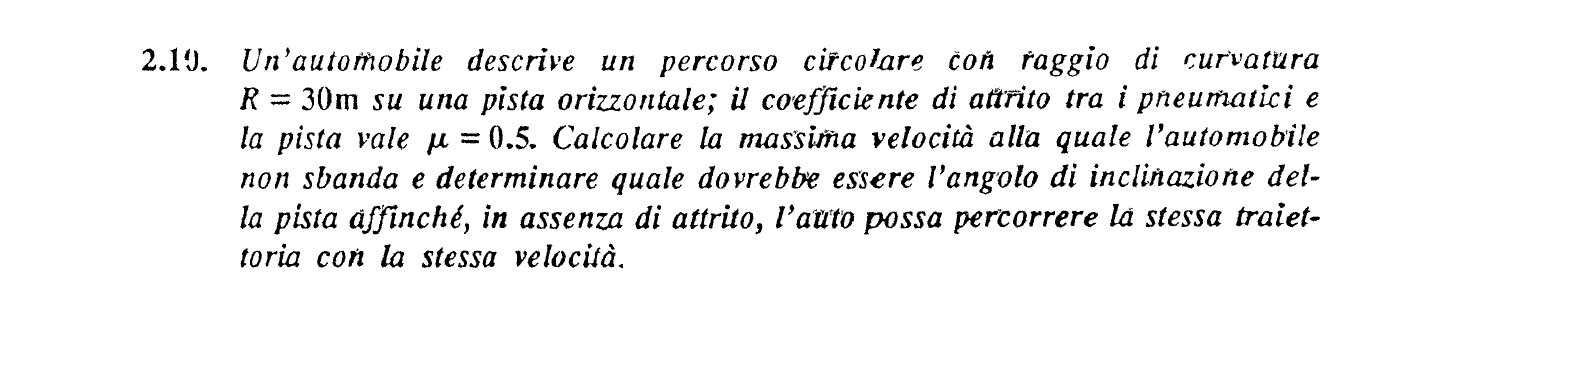

In [6]:
Image('Immagini/MSV_2.10_Testo.png',width=1100)

__Svolgimento__

In questo caso la forza di attrito deve fornire la componente centripeta dell'accelerazione necessaria per
descrivere il moto circolare. 

Nella direzione normale al moto, se il raggio è costante, l'automobile è ferma, quindi siamo in presenza
di un attrito statico fra i pneumatici e il terreno. L'automobile non sbanda se 
$$
m\frac{v^2}{R} \leq \mu m g
$$
La velocità massima è quindi data da $v_{max} = \sqrt{\mu g R}$

In assenza di attrito, se il moto avviene su una pista inclinata è la componente orizzontale della reazione vincolare
che può fornire la forza centripeta necessaria per mantenere l'automobile in assetto.

...........

## MSV - Esercizio 2.36

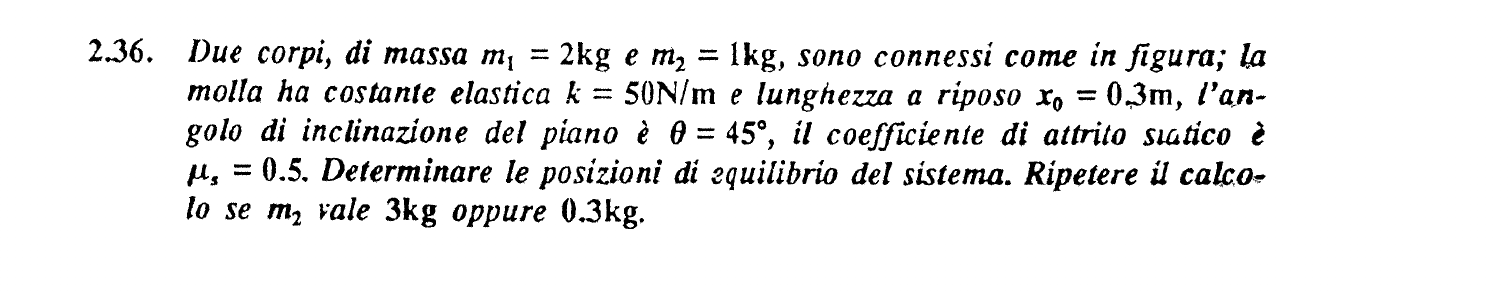

In [10]:
Image('Immagini/MSV_2.36_Testo1.png',width=1000)

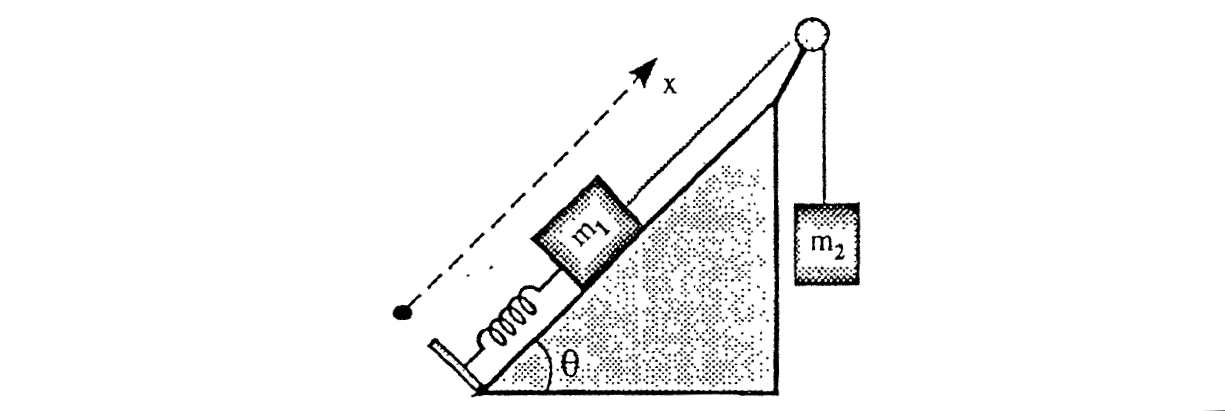

In [11]:
Image('Immagini/MSV_2.36_Testo2.png',width=1000)

__Svolgimento__

Dall'equazione del moto per $m_2$ in condizioni di equilibrio ricaviamo la tensione del filo
$$
T = m_2 g
$$
La risultante delle forze (escluso l'attrito) agente su $m_1$ lungo la direzione del piano inclinato è 
$$
- k \Delta x - m_1 g sin(\theta) + m_2 g 
$$
Il sistema è in equilibrio se il modulo della forza risultante lungo il piano è minore o uguale a $F_s = \mu_s m_1 g cos(\theta)$
$$
|-k\Delta x + A| \leq F_s \, , \quad \rightarrow \left\{  
\begin{array}{c}
-k\Delta x + A \leq F_s\\
k\Delta x - A \geq -F_s\\
\end{array}
\right.
$$
con $A= m_2 g- m_1 g sin(\theta)$.

Aiutiamoci con i valori numerici dei parametri (nel primo caso)

In [36]:
m1,m2 = 2.,1. # kg
k = 50 # N/m
mu = 0.5
theta = 45*np.pi/180 # rad

In [37]:
Fs = mu*m1*g*np.cos(theta)
A = m2*g-m1*g*np.sin(theta)
Fs,A

(6.929646455628166, -4.05929291125633)

Se la molla è in estensione $(\Delta x \geq 0)$ la forza di richiamo è concorde ad $A$, in questo caso la condizione è 
$$
\Delta x \leq \frac{F_s+A}{k}
$$
ovvero minore di

In [34]:
Dx = (Fs+A)/k
Dx_round = round(Dx,3)
print('Dx <= %s m'%Dx_round)

Dx <= 0.057 m


Se la molla è in compressione $(\Delta x \leq 0)$ la forza di richiamo è opposta ad $A$, in questo caso la condizione è 
$$
\Delta x \leq \frac{F_s-A}{k}
$$
ovvero minore di

In [35]:
Dx = (Fs-A)/k
Dx_round = round(Dx,3)
print('Dx <= %s m'%Dx_round)

Dx <= 0.22 m


Analizzate gli altri casi con lo stesso criterio.

## Cinematica : MSV - Esercizio 1.23

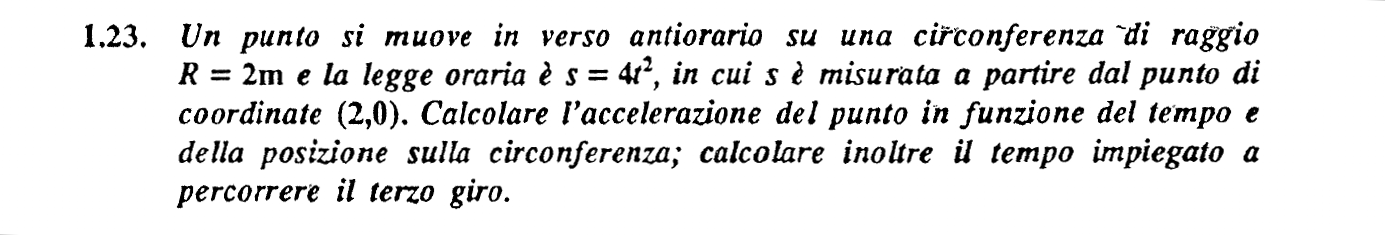

In [2]:
Image('Immagini/MSV_1.23_Testo.png',width=1000)

__Svolgimento__

In questo caso la legge oraria è espressa in funzione dell'ascissa curvilinea, ovvero nel caso specifico,
della lunghezza percorsa lungo l'arco di circonferenza in funzione del tempo.

Per comodità (e per controllo dimensionale!) riscriviamo la legge oraria come $s = b t^2$, che dimensioni ha $b$?.

La velocità si scrive come
$$
v = \frac{ds}{dt} = 2bt
$$
e il vettore velocità è tangente alla circonferenza. Dalla derivata del modulo della velocità ricaviamo l'accelerazione
tangente (ovvero parallela alla velocità)
$$
a_t = \frac{dv}{dt} = 2b
$$
Oltre a questa componente, l'accelerazione ha anche un contributo normale, diretto verso il centro della circonferenza,
di modulo
$$
a_N = \frac{v^2}{R} = \frac{4b^2t^2}{R}
$$
Per calcolare l'accelerazione in funzione della configurazione usiamo la relazione $vdv = ads$, che in un moto con accelerazione
costante da $v(s)^2 = 2bs$, da cui ricaviamo che l'accelerazione centripeta in funzione della configurazione è 
$$
a_N(s) = \frac{2bs}{R}
$$
mentre l'accelerazione tangenziale è costante.

Il tempo impiegato per percorrere l'ennesimo giro si calcola dalla differenza dei tempi $t_f$ e $t_i$ definiti da
$$
2\pi n R = bt_f^2 \, , \quad 2\pi (n-1) R = bt_i^2 
$$
da cui $\Delta t = \sqrt{\frac{2\pi R}{b}}(\sqrt{n}-\sqrt{n-1})$. Sostituendo i valori numerici

In [6]:
R = 2 # m
b = 4 # m/t^2
n = 3

In [9]:
dt = np.sqrt(2*np.pi*R/b)*(np.sqrt(n)-np.sqrt(n-1))
dt_round = round(dt,ndigits)
print('Tempo impiegato = %s s'%dt_round)

Tempo impiegato = 0.56 s


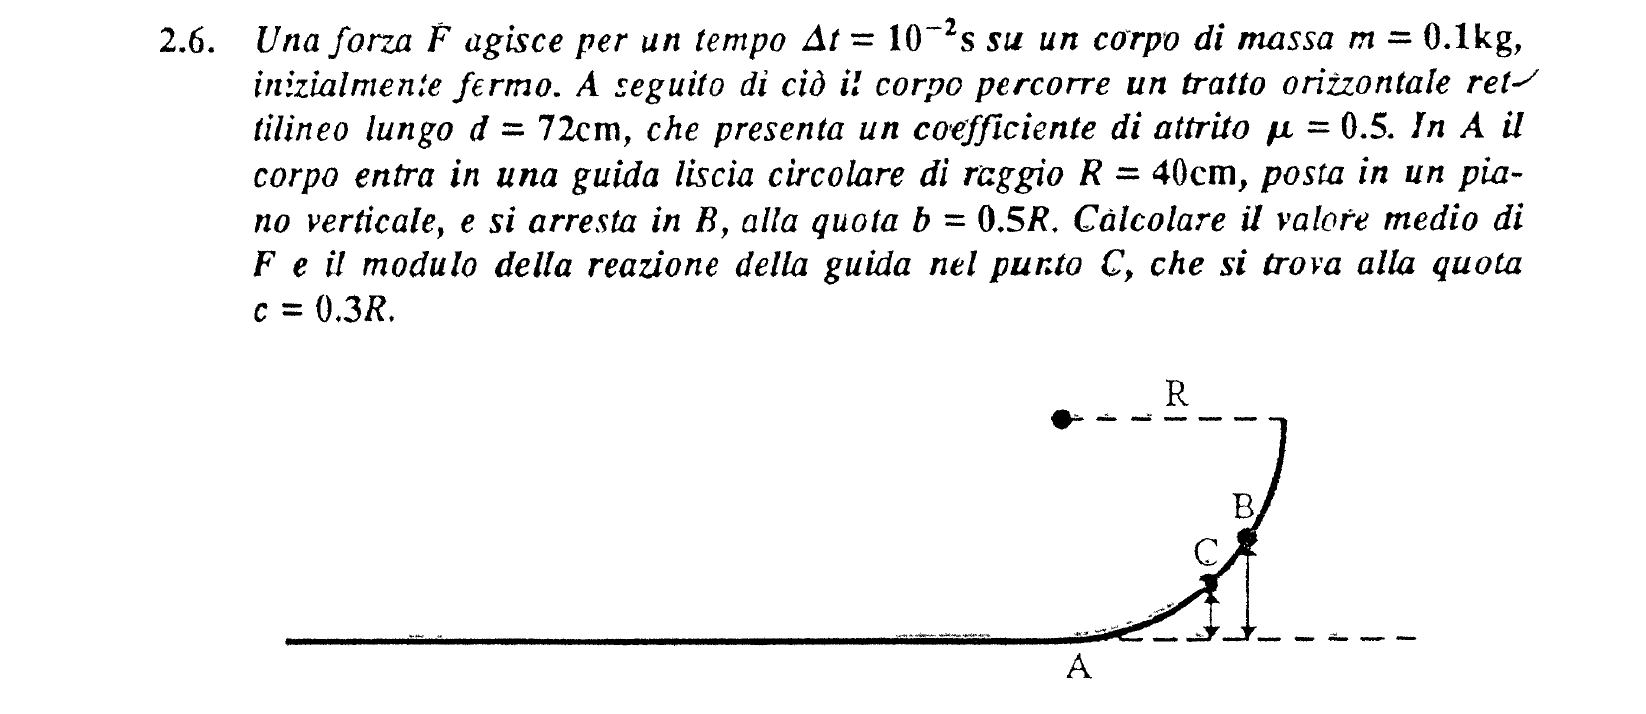

In [3]:
Image('Immagini/MSV_2.6_Testo.png',width=1000)

__Svolgimento__

Applicando il teorema dell'impulso (consideriamo la forza costante, con valore pari al suo valor medio per la durata
di applicazione della forza sul corpo) esprimiamo la velocità iniziale come
$$
v_0 = \frac{\bar{F}\Delta t}{m}
$$
Usiamo il lavoro della forza di attrito per esprimere la variazione di energia cinetica al termine del tratto rettilineo
$$
\frac{m}{2}\left(v_A^2-v_0^2\right) = -\mu mg d
$$
Utilizziamo la conservazione dell'energia meccanica (la guida è liscia, quindi è presente la sola reazione vincolare
che non contribuisce al bilancio energetico del moto)
$$
\frac{m}{2}v_A^2 = mg\frac{R}{2}
$$
Abbiamo quindi tutti gli elementi necessari per rispondere al primo quesito del problema. Notate la semplicità della 
soluzione, grazie all'utilizzo dell'energia, e osservate che abbiamo ignorato molti dettagli meccanici del problema,
sempre in virtà del fatto che abbiamo usato leggi di conservazione piuttosto che l'analisi diretta delle equazioni del moto.

Scriviamo quindi l'espressione per il valor medio della forza
$$
\bar{F} =\frac{m}{\Delta t} \sqrt{gR+2\mu g d}
$$
Sostituendo i valori numerici

In [11]:
Dt = 1e-2 #s
mu = 0.5
m = 0.1 # kg
d = 0.72 #m
R = 0.4 #m
c = 0.3*R # m

In [10]:
F = m/Dt*np.sqrt(g*R+2*mu*g*d)
F_round = round(F,ndigits)
print('Il valor medio di F è  = %s N'%F_round)

Il valor medio di F è  = 33.13 N


Per calcolare la reazione vincolare nel punto indicato usiamo le equazioni del moto e la conservazione dell'energia meccanica 
$$
N_C-mg cos(\theta_C) = m\frac{v_C^2}{R} \, , \quad
\frac{m}{2}\left(v_A^2-v_C^2\right) = mg c
$$
e inoltre vale la condizione $cos(\theta_C) = 1- c/R$. Abbiamo quindi
$$
N_C = mg \left(2 - \frac{3c}{R} \right)
$$
Sostituiamo i valori numerici

In [14]:
Nc = m*g*(2-3*c/R)
Nc_round = round(Nc,ndigits)
print('La reazione vincolare in c vale  = %s N'%Nc_round)

La reazione vincolare in c vale  = 1.08 N


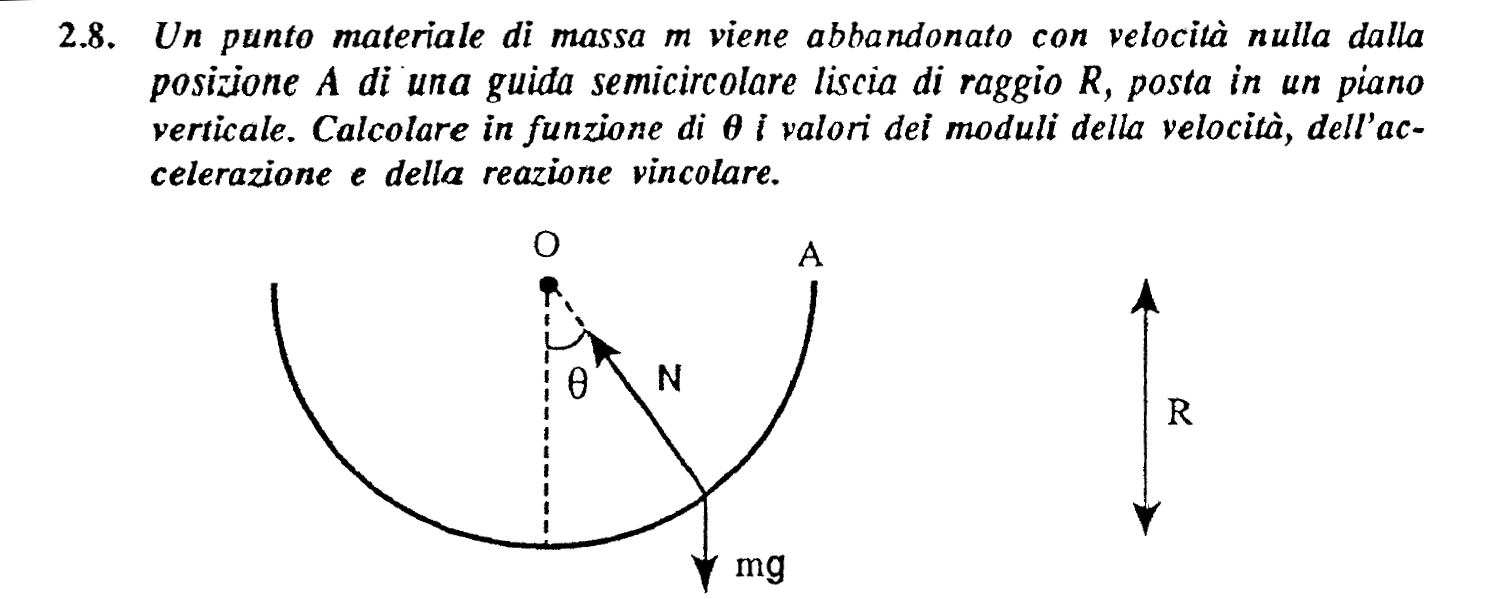

In [4]:
Image('Immagini/MSV_2.8_Testo.png',width=1000)

__Svolgimento__

Al solito scriviamo le equazioni del moto proiettate lungo gli assi normale e tangente alla guida circolare (se fosse un 
pendolo sarebbe la stessa cosa).

L'equazione per la componente normale contiene la reazione vincolare
$$
N-mg cos(\theta) = m\frac{v^2}{R}
$$
mentre quella lungo l'asse tangente è
$$
m a_t = mg sin(\theta)
$$
Da cui abbiamo
$$
N = m\left( g cos(\theta) + \frac{v^2}{R} \right) \, , \quad
a_t = g sin(\theta)
$$
Per rispondere al quesito del testo dobbiamo esprimere accelerazione tangente e reazione vincolare in funzione della sola
configurazione, ovvero dell'angolo $\theta$ che individua la posizione del punto sulla guida. 

Potremmo utilizzare le equazioni del moto, risolverle e calcolare $v$. Purtroppo ci troviamo nella stessa situazione delle equazioni 
del pendolo semplice ma l'approssimazione di piccole oscillazioni non è applicabile. 
E' però possibile (e in generale SEMPRE conveniente) utilizzare la conservazione dell'energia meccanica.

L'energia potenziale gravitazione _cresce_ con l'altezza. Scegliendo lo _zero_ nel punto più basso della guida si esprime in funzione
della configurazione come $mgR (1-cos(\theta))$. Applichiamo quindi la conservazione dell'energia meccanica
$$
mgR = \frac{1}{2}m v(\theta)^2 + mgR(1-cos(\theta))
$$
da cui ricaviamo la velocità (con uno sforzo minimo, se comparato con quello necessario per affrontare le equazioni del moto!)
$$
v(\theta)^2 = 2gRcos(\theta)
$$
Nota la velocità, calcoliamo il modulo della reazione vincolare e l'accelerazione normale
$$
a_N = \frac{v^2}{R} = 2gcos(\theta) \, , \quad
N = 3mg cos(\theta)
$$
e infine il modulo dell'accelerazione
$$
a = g\sqrt{4cos^2(\theta)+sin^2(\theta)} = g\sqrt{1+3cos^2(\theta)} 
$$

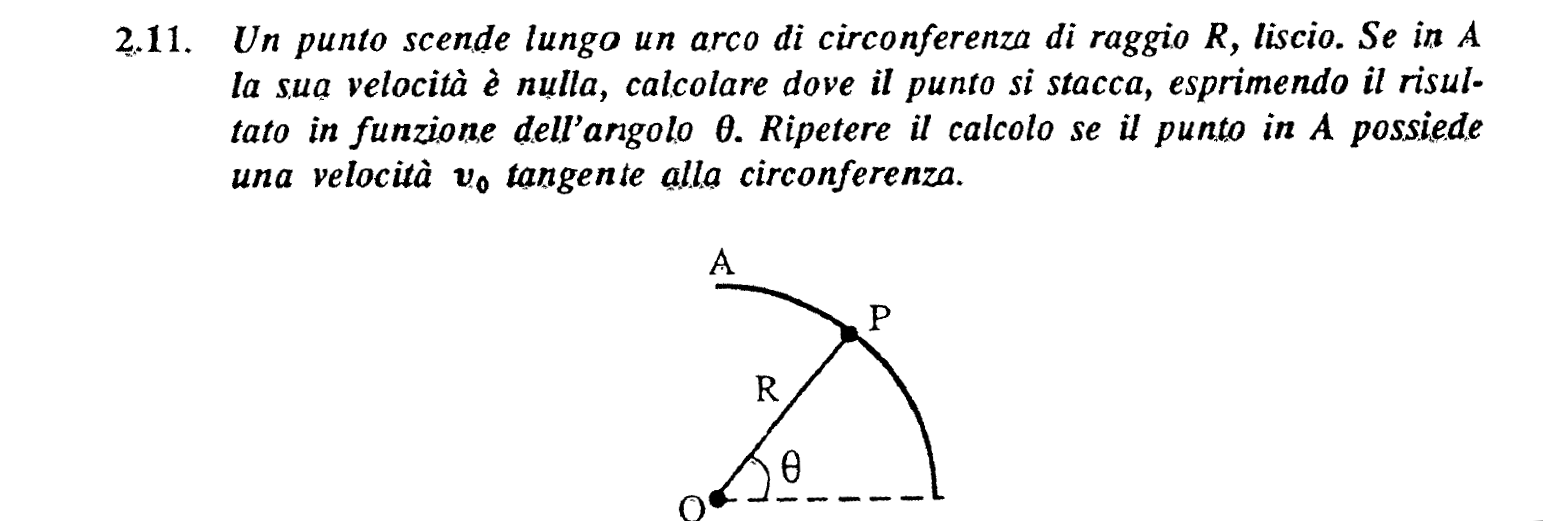

In [5]:
Image('Immagini/MSV_2.11_Testo.png',width=1000)

__Svolgimento__

Scriviamo la componente delle equazioni del moto lungo l'asse normale (orientato verso il centro della guida)
$$
N+ mg sin(\theta) = m \frac{v^2}{R} , \quad \rightarrow \quad
N = m \left( \frac{v^2}{R} - gsin(\theta) \right)
$$
affinchè il punto materiale non si stacchi dalla guida deve essere $N<0$. 

Usiamo la conservazione dell'energia (per una velocità inziale $v_0$ arbitraria)
$$
\frac{1}{2}m v_0^2 + mgR = \frac{1}{2}m v^2 + mgRsin(\theta) 
$$
da cui ricaviamo $v^2$ e quindi espriamo $N$ in funzione della configurazione
$$
v^2 = v_0^2 + 2gR\left(1-sin(\theta)\right) \, , \quad
N = m \left( \frac{v_0^2}{R} + g(2-3sin(\theta)) \right)
$$
Il distacco avviene quando $N$ = 0, ovvero quando $sin(\theta) = 2/3$, che corrisponde a $\theta \simeq 41,8$ gradi.

Se $v_0 \neq 0$, il distacco avviene prima e per $v^2_0 \geq Rg$ il punto si stacca in A.

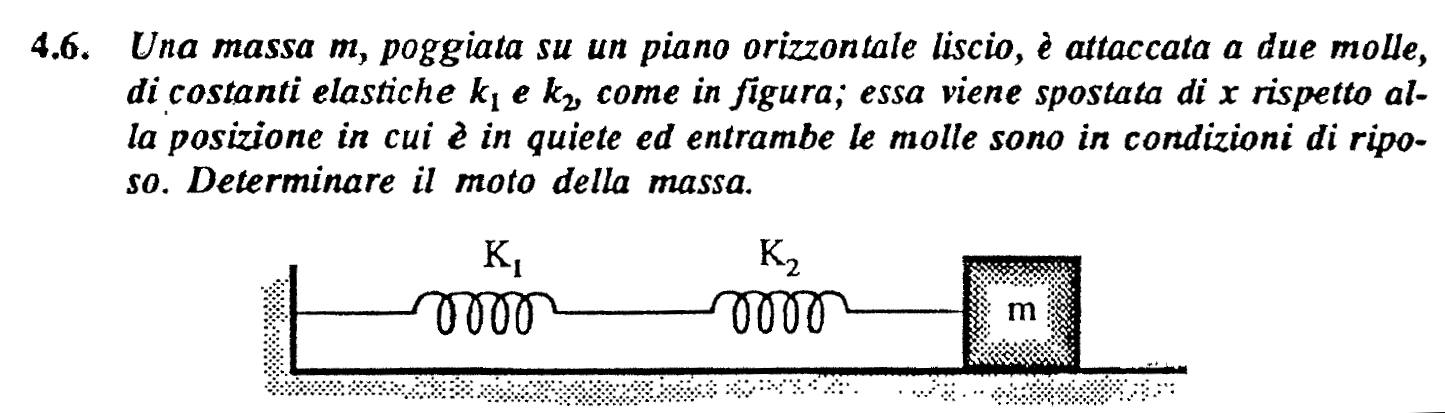

In [2]:
Image('Immagini/MSV_4.6_Testo.png',width=900)

__Svolgimento__

La forza che agisce su $m$ è uguale alla forza che forma ciascuna delle due molle.
Per capirlo ragionate a partire dalla massa $m$ che in virtù della forza applicata 
tira l'estremo destro di $k_2$ con la forza $F$. $k_2$ si deforma sotto l'azione di $F$
e l'estremo sinistro di $k_2$ risente della forza di richiamo (pari a $F$). La stessa forza
è veicolata dal tratto di filo fino all'estremo destro di $k_1$ e il ragionamento si ripete.

Per cui abbiamo
$$
x = x_1+x_2 = \frac{F}{k} \, , \quad
x_1 = \frac{F}{k_1} \, , \quad x_2 = \frac{F}{k_2}
$$
ne segue che
$$
\frac{1}{k} = \frac{1}{k_1}+\frac{1}{k_2} \, \quad \rightarrow \quad
k = \frac{k_1 k_2}{k_1+k_2}
$$
che fornisce l'espressione della costante _equivalente_ di due molle in serie.

Il moto del sistema è armonico con pulsazione
$$
\omega = \sqrt{\frac{k}{m}} = \sqrt{\frac{k_1 k_2}{m(k_1+k_2)}} 
$$

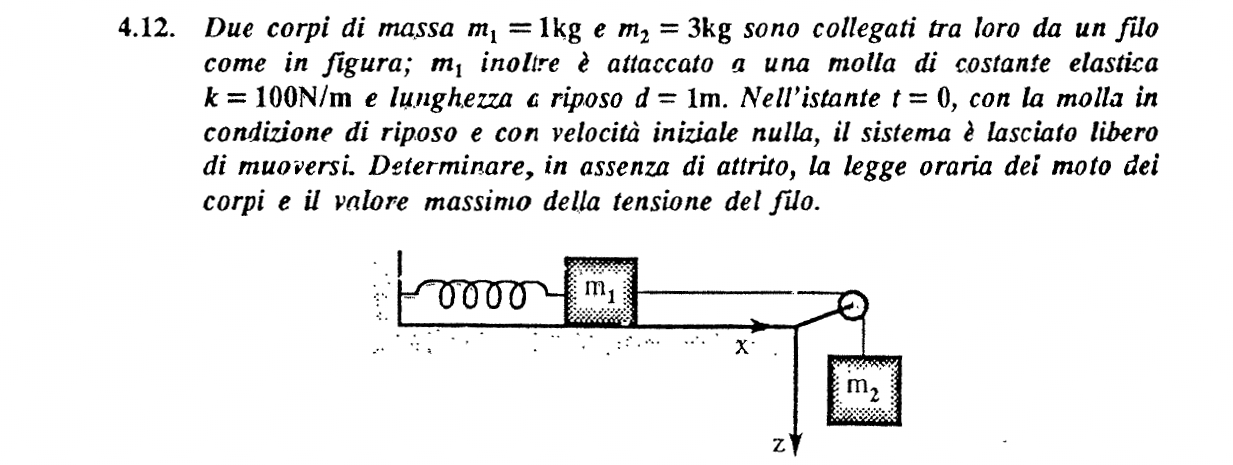

In [6]:
Image('Immagini/MSV_4.12_Testo.png',width=1000)

__Svolgimento__

Usiamo l'equazione del moto di $m_2$ (componente verticale)
$$
m_2 g - T = m_2 a
$$
Da questa possiamo scrivere l'equazione del moto per $m_1$ componente orizzontale
senza far apparire la tensione del filo
$$
-k (x-d) + m_2 (g-a) = m_1 a
$$
quindi
$$
\frac{d^2 x}{d t^2} + \frac{k}{m_1+m_2}x = \frac{m_2g + kd}{m_1+m_2}
$$
E' l'equazione di un oscillatore armonico soggetto a un termine di forza esterna costante $F_0$.
La riscriviamo introducendo la pulsazione e abbiamo
$$
\frac{d^2 x}{d t^2} + \omega^2 (x - \frac{F_0}{\omega^2}) = 0
$$
con $\omega^2=\frac{k}{m_1+m_2}$. E parametrizziamo la soluzione come
$$
x(t) = d + \frac{m_2g}{k} + x_0 cos(\omega t)
$$
Abbiamo scelto la dipendenza dal coseno (con una fase nulla) perché sappiamo che la velocità
iniziale deve essere nulla. Imponendo $x(0) = d$ abbiamo $x_0 = - \frac{m_2g}{k}$.
In complesso si ottiene
$$
x(t) = d + \frac{m_2 g}{k}\left(1-cos(\omega t) \right)
$$
La tensione del filo in funzione del tempo si ottiene dall'equazione del moto per $m_2$ sostituendo
l'espressione esplicita di $a$
$$
T = m_2 g \left( 1- \frac{m_2}{m_1+m_2}cos(\omega t) \right)
$$
La tensione è sempre positiva e il valore massimo si ottiene quando $cos(\omega t) = -1$
$$
T_{max} = m_2 g \frac{m_1+2m_2}{m_1+m_2}
$$

In [3]:
m1,m2 = 1,3
T = m2*g*(m1+2*m2)/(m1+m2)
T_round = round(T,ndigits)
print('La tensione massima vale  = %s N'%T_round)

La tensione massima vale  = 51.45 N
